In [1]:
import numpy as np
from pymatgen import Composition, Element
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#load main group element

element_list_main_path="../data_set/element_list/elements_list_main.txt"
with open(element_list_main_path, "r") as text_file:
    a=text_file.read()
elements_list_main=a.split()

In [3]:
#load main group element number
raw_number_list_path="../data_set/element_list/elements_list_main_number.txt"
raw_number=np.loadtxt(raw_number_list_path,dtype="int")

In [4]:
#load element vector data
vector_data_path="../data_set/element_vector_generation/laplace_eigenmap/laplace_eigenmap_adas.txt"
F=np.loadtxt(vector_data_path)
F=F[raw_number,:]

In [5]:
F[0]

array([ 0.05473522, -0.02188678,  0.13046959,  0.10069591, -0.03568042,
        0.01109497, -0.00287217,  0.00565794,  0.01414992, -0.01762635,
        0.00622221,  0.01930403, -0.02530814,  0.01624647,  0.02500301,
        0.18783326, -0.00247819, -0.02032727, -0.02790453, -0.0093633 ])

In [6]:
#normalize F
#from sklearn.preprocessing import normalize
#F_norm=normalize(F, norm='l2', axis=1)

In [7]:
#F=F_norm

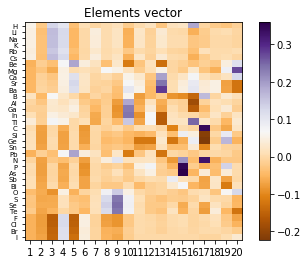

In [8]:
vegetables = elements_list_main
farmers = list(range(1,21))

harvest = F


fig, ax = plt.subplots()
im = ax.imshow(harvest,aspect=20/34,cmap="PuOr")
#figure(num=None, figsize=(10, 20), dpi=1000, facecolor='w', edgecolor='k')
# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables,fontsize=7)
fig.colorbar(im)
# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         #rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
    #for j in range(len(farmers)):
        #text = ax.text(j, i, harvest[i, j],
                       #ha="center", va="center", color="w")

ax.set_title("Elements vector")
#fig.tight_layout()
plt.show()
fig.savefig("test.pdf",format="pdf",dpi=1000)

In [9]:
ax_combo_colormap=ax
figure_combo_colormap=fig

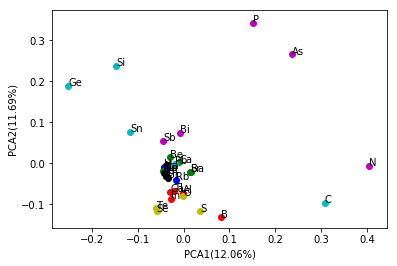

In [10]:
from sklearn.decomposition import PCA
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
pca=PCA(n_components=None, copy=True, whiten=False)

pcaTransformed_lat = pca.fit_transform(F)
first2pca = pcaTransformed_lat[:,:2]
data_main = first2pca[:,:]
data_main.shape
#data_main_flip=np.flip(data_main,axis=1)

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
'''
elements_list_main[0:6]
elements_list_main[6:11]
elements_list_main[11:16]
elements_list_main[16:21]
elements_list_main[21:26]
elements_list_main[26:30]
elements_list_main[30:]
'''
fig,ax= plt.subplots()
ax.scatter(data_main[:6,0],data_main[:6,1],color='b')
ax.scatter(data_main[6:11,0],data_main[6:11,1],color='g')
ax.scatter(data_main[11:16,0],data_main[11:16,1],color='r')
ax.scatter(data_main[16:21,0],data_main[16:21,1],color='c')
ax.scatter(data_main[21:26,0],data_main[21:26,1],color='m')
ax.scatter(data_main[26:30,0],data_main[26:30,1],color='y')
ax.scatter(data_main[30:,0],data_main[30:,1],color='k')
#plt.xlim(-0.4,0.75)
#plt.ylim(-0.5,0.75)
for i in range(len(elements_list_main)):
    txt = elements_list_main[i]
    ax.annotate(txt, (data_main[i,0], data_main[i,1]))
plt.xlabel("PCA1(12.06%)")
plt.ylabel("PCA2(11.69%)")
fig.savefig("scatter_encoder+svd.pdf",format="pdf",dpi=1000)

In [11]:
pca.explained_variance_ratio_

array([1.52451926e-01, 1.27956778e-01, 1.21112321e-01, 1.15373372e-01,
       1.06914778e-01, 9.97542063e-02, 7.66214290e-02, 6.86909859e-02,
       5.34884977e-02, 4.86983262e-02, 2.43774092e-02, 2.78394477e-03,
       9.25620124e-04, 4.83121612e-04, 2.65951595e-04, 7.14654506e-05,
       2.68107775e-05, 3.03149767e-06, 1.41683731e-08, 1.02168525e-08])